In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("HP_engine.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5672,Volkswagen,GTI,2013,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,33,24,873,30795
11417,Chrysler,Voyager,2003,regular unleaded,150.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,25,18,1013,20960
154,BMW,3 Series,2016,premium unleaded (required),320.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,High-Performance",Midsize,Sedan,33,22,3916,45800
5356,Mercedes-Benz,GLS-Class,2017,premium unleaded (required),577.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Large,4dr SUV,17,13,617,124100
73,Chrysler,200,2016,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,29,18,1013,29905


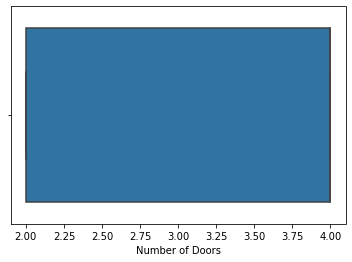

In [2]:
# No outliers
sns.boxplot(x=df['Number of Doors'])

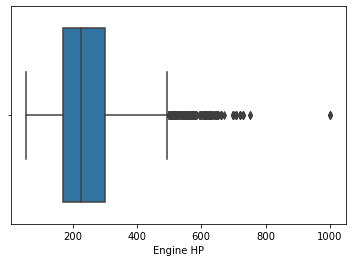

In [3]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [43]:
import numpy as np 

s = [1, 3,3,3,3,3,3,3,3,3,3,3.5,4,4,4,4,4,4,4,4,4,4,5,5,5,5]
s_a = np.asarray(s)

media = s_a.mean()
std = s_a.std()

print("media:", s_a.mean())
print("std:", s_a.std())


media: 3.6346153846153846
std: 0.8721954208037359


In [41]:
diferencia = abs(media - 1)
print("Diferencia con respecto a la media:\n", diferencia)

Diferencia con respecto a la media:
 6.166666666666667


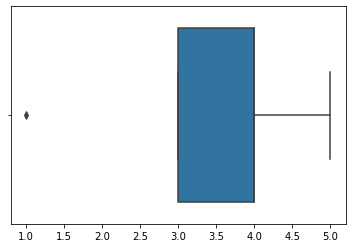

In [44]:
sns.boxplot(x=s_a)

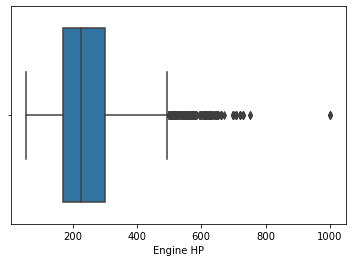

In [46]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [45]:
df["Engine HP"].quantile(0.25)

170.0

In [47]:
df["Engine HP"].quantile(0.75)

300.0

In [13]:
df["Popularity"].max()

5657

In [14]:
df["Popularity"].quantile(1)

5657.0

In [15]:
df["Popularity"].min()

2

In [16]:
df["Popularity"].quantile(0)

2.0

In [19]:
df["Popularity"].quantile(0.75)

2009.0

In [48]:
df["Popularity"].quantile(0.5)

1385.0

In [49]:
df["Popularity"].median()

1385.0

In [ ]:
sns.boxplot(x=df['Popularity'])

In [6]:
df.quantile(0.25)

Year                 2007.0
Engine HP             170.0
Engine Cylinders        4.0
Number of Doors         2.0
highway MPG            22.0
city mpg               16.0
Popularity            549.0
MSRP                21000.0
Name: 0.25, dtype: float64

In [7]:
df.quantile(0.75)

Year                 2016.00
Engine HP             300.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            30.00
city mpg               22.00
Popularity           2009.00
MSRP                42231.25
Name: 0.75, dtype: float64

In [52]:
# Hard technique

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [53]:
df.shape

(11914, 16)

In [54]:
IQR * 1.5

Year                   13.500
Engine HP             195.000
Engine Cylinders        3.000
Number of Doors         3.000
highway MPG            12.000
city mpg                9.000
Popularity           2190.000
MSRP                31846.875
dtype: float64

In [55]:
# Límite superior antes de outlier
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [58]:
# Límite inferior antes de outlier
(Q1 - (1.5 * IQR))

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

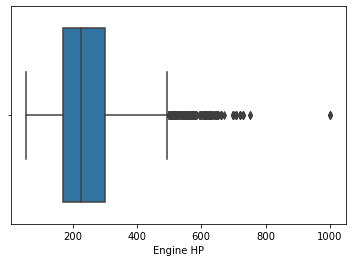

In [60]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [63]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

valor max para engine HP 1001.0


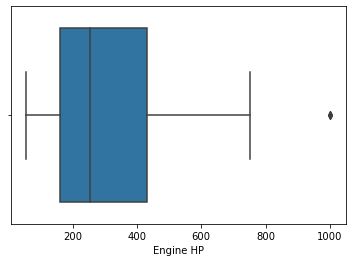

In [79]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR_RIC = Q3 - Q1
limite_inferior = (Q1 - 1.5 * IQR_RIC)
limite_superior = (Q3 + 1.5 * IQR_RIC)

# Get the real rows 
# Esto está cogiendo todos los valores que están dentro de los límites superior e inferior del boxplot que representan outliers
df2 = df[((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
# Valores que están fuera del rango --> Los outliers
print("valor max para engine HP", df2['Engine HP'].quantile(1))
sns.boxplot(x=df2['Engine HP'])

In [48]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [ ]:
#~ --> altGr + 4 y espacio
#| --> altGr + 1

In [81]:
# Get the opposite --> Valores que no son outliers
df3 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2.shape)
df3.shape

(2830, 16)


(9084, 16)

In [87]:
df3['Engine HP'].min()

66.0

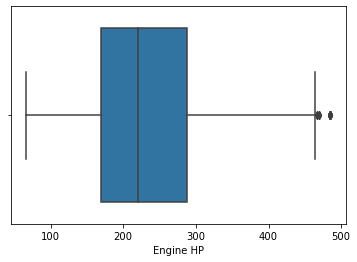

In [85]:
sns.boxplot(x=df3['Engine HP'])

Year                 2016.00
Engine HP             288.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            31.00
city mpg               22.00
Popularity           1851.00
MSRP                39408.75
Name: 0.75, dtype: float64

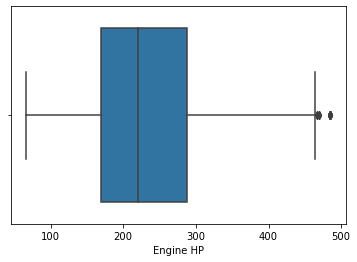

In [50]:
# Outliers After
sns.boxplot(x=df2['Engine HP'])

df2.quantile(0.75)

In [45]:
df.quantile(1)

Year                   2017.0
Engine HP              1001.0
Engine Cylinders         16.0
Number of Doors           4.0
highway MPG             354.0
city mpg                137.0
Popularity             5657.0
MSRP                2065902.0
Name: 1, dtype: float64